In [1]:
import pandas as pd
from pandas import *  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')

file=r'C:\datas22.csv'
data_education=pd.read_csv(file, sep=';')
data_education_NoMissing=data_education.drop(data_education.columns[1:4], axis=1)
data_education_NoMissing=data_education_NoMissing.drop(data_education_NoMissing.columns[2:], axis=1)
data_education_NoMissing=data_education_NoMissing.dropna()
data_education_NoMissing.rename(columns={"LOCATION":"Country","Education Rate":"EducationRate"}, inplace=True)
data_education_NoMissing.index=list(range(len(data_education_NoMissing)))
data_education_NoMissing.index


file1=r'C:\WomanViolence.csv'
data_violence=pd.read_csv(file1, sep=';')
data_violence=data_violence.drop(['TIME'] , axis=1)
data_violence_NoMissing=data_violence.dropna()
data_violence_NoMissing.rename(columns={"LOCATION":"Country","Rate":"ViolenceRate"}, inplace=True)
data_violence_NoMissing.index=list(range(len(data_violence_NoMissing)))
data_violence_NoMissing.index
data= pd.merge(left=data_education_NoMissing, right=data_violence_NoMissing , on=['Country'] , how= 'left')


file2=r'C:\ER2.csv'
data_er=pd.read_csv(file2,sep = ';')
data1=pd.merge(left=data , right = data_er,on=['Country'] , how= 'left')
data1=data1.drop(['Country'],axis=1)
data1=data1.dropna()
columnsTitles=["EducationRate","GDPpercapita","ViolenceRate"]
data1=data1.reindex(columns=columnsTitles)
data1=data1.reset_index(drop=True)


In [2]:
print(data1.head())
corrData=data1.corr()
corrData

   EducationRate  GDPpercapita  ViolenceRate
0          106.3  51733.481920             4
1           80.7  14139.269430             6
2           97.2   5045.769926            11
3           71.0  57543.669060             7
4           63.2   1740.915011            20


,EducationRate,GDPpercapita,ViolenceRate
EducationRate,1.000000,0.204038,-0.737920
GDPpercapita,0.204038,1.000000,-0.009995
ViolenceRate,-0.737920,-0.009995,1.000000


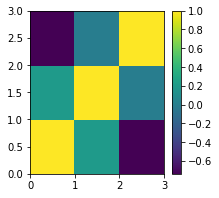

In [3]:
plt.figure(figsize=(3,3))
plt.pcolor(corrData) # the matrix is visualized below
plt.colorbar();

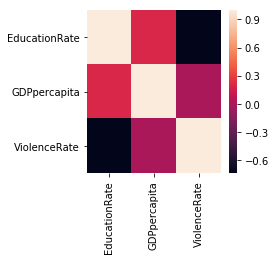

In [4]:
import seaborn as sns
fig = plt.figure(figsize=(3,3))
sns.heatmap(corrData)